# 딥러닝 개발 준비

### Google Colab

- 환경도 잘 되어 있고 많이 사용
- 런타임 - 런타임 유형 변경 - 하드웨어 가속기
  - None : CPU
  - GPU
- !nvidia-smi
  - 현재 사용 중인 스펙 확인 가능 (CPU/GPU 등)
  - 무료 버전에서 제일 좋은 GPU는 P100
- 무료 버전에서는 12시간까지 연속 사용 가능
  - 이후에는 연결 끊김
  - Google Drive와 연동되어 있기 때문에 사용 중인 script 저장 가능
- Google Drive에서 Script 클릭 했는데 연동 안되고 까만 화면 뜰 때
  - Google Drive 우측 상단 설정 - 앱 관리 - Google Collaboratory - 기본값으로 사용 체크
- 단점
  - 필요한 모든 데이터를 Google Drive에 업로드해야 함

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch

print(tf.__version__)
print(torch.__version__)

2.2.0
1.11.0


# 1. Numpy Tutorial

Numpy는 Numerical Python의 줄임말

## 1.1 Numpy ndarray
- N차원의 배열 객체
- 대규모 데이터 집합을 담을 수 있는 빠르고 유연한 자료구조

In [ ]:
a = np.array([1,2,3])
print(a, type(a))

List와 비교

In [ ]:
L = [1,2,3]
A = np.array([1,2,3])
print(L)
print(A)

In [ ]:
for item in L:
    print(item)

for item in A:
    print(item)

In [ ]:
L.append(4)
print(L)

# A.append(4) -> Error
A = np.append(A,4)
print(A)

In [ ]:
L = L + [5]
print(L)

A = A + np.array([5])
print(A)

모든 원소를 2배로 만들기

In [ ]:
L = [1, 2, 3]
L2 = []
for item in L:
    L2.append(item*2)
print(L*2)
print(L2)

A = np.array(L)
A2 = A*2
print(A2)

## 1.2 배열
- 모두 같은 유형의 값
- 음수가 아닌 정수의 튜플로 인덱싱
- 차원의 수는 배열의 rank
- 배열의 shape은 각 차원 별 배열 크기의 tuple
- 중첩된 파이썬 리스트로부터 numpy 배열을 초기화 할 수 있고 대괄호를 사용하여 요소에 접근 가능

In [ ]:
a = np.array([1,2,3])
print(a)
print(type(a), a.ndim, a.shape, a.dtype)

In [ ]:
b = np.array(a)
print(b)

- array : b의 값을 변경한다고 a값이 변경되지는 않음
- ★ asarry : b_copy를 변경하면 b도 변경됨

In [ ]:
b_copy = np.asarray(b)
print(b_copy)

In [ ]:
b_copy[0] = 9
print(b)
print(b_copy)

0으로 채우기

In [ ]:
a = np.zeros((3,4))
print(a)

1로 채우기

In [ ]:
b = np.ones((5,2))
print(b)

2행 3열로 만들고 4로 채우기

In [ ]:
c = np.full((2,3),4)
print(c)

랜덤 값으로 3행 3열 만들기

In [ ]:
d = np.empty((3,3))
print(d)

- np.zeros_like : a와 같은 행/열 개수를 만들고 숫자는 0으로 채우기
- np.ones_like : a와 같은 행/열 개수를 만들고 숫자는 1로 채우기
- np.full_like : a와 같은 행/열 개수를 만들고 숫자는 지정 숫자(2)로 채우기
- np.empty_like : a와 같은 행/열 개수를 만들고 숫자는 랜덤하게 채우기

In [ ]:
e = np.zeros_like(a)
f = np.ones_like(a)
g = np.full_like(a,2)
h = np.empty_like(a)
print(e)
print(f)
print(g)
print(h)

항등행렬

In [ ]:
i = np.eye(3)
j = np.identity(3)
print(i)
print(j)

In [ ]:
k1 = np.arange(10)
print(k1)

In [ ]:
k2 = np.arange(1,11)
print(k2)

In [ ]:
k3 = np.arange(10,0,-1)
print(k3)

Uniform Distribution
- rand : 똑같은 확률로 뽑는 것

In [ ]:
l = np.random.rand(2,2)
print(l)

Normal Distribution
- 평균 0, 표준편차 1 그래프에서 뽑은 숫자

In [ ]:
m = np.random.randn(2,2)
print(m)

### 1.2.1 배열의 dtype

In [ ]:
a = np.array([1,2,3])
b = np.array([1,2,3], dtype=np.float64)
c = np.array([1,2,3], dtype=np.int32)

print(a.dtype, b.dtype, c.dtype)

In [ ]:
d = np.array([1,2,3], dtype='i1')
e = np.array([1,2,3], dtype='i2')
f = np.array([1,2,3], dtype='i4')
g = np.array([1,2,3], dtype='i8')

print(d.dtype, e.dtype, f.dtype, g.dtype)

unsigned int

In [ ]:
d = np.array([1,2,3], dtype='u1')
e = np.array([1,2,3], dtype='u2')
f = np.array([1,2,3], dtype='u4')
g = np.array([1,2,3], dtype='u8')

print(d.dtype, e.dtype, f.dtype, g.dtype)

floating point

In [4]:
h = np.array([1,2,3], dtype='f2')
i = np.array([1,2,3], dtype='f4')
j = np.array([1,2,3], dtype='f8')
#k = np.array([1,2,3], dtype='f16')

print(h.dtype, i.dtype, j.dtype)

# f2, f4 등이 아니라 약자로 표현할 수도 있음
i = np.array([1,2,3], dtype='f')
j = np.array([1,2,3], dtype='d')
k = np.array([1,2,3], dtype='g')

print(i.dtype, j.dtype, k.dtype)

float16 float32 float64
float32 float64 float64


type 변경

In [6]:
i = i.astype(np.int32)
print(i.dtype)

# i와 같은 type으로 변경
j = j.astype(i.dtype)
print(j.dtype)

int32
int32


### 1.2.2 배열 indexing & slicing
- indexing : 항상 차원이 감소됨
- slicing : 차원 유지

In [8]:
a = np.arange(10)
print(a)

# indexing
print(a[5])
print(a[-1])

# slicing
print(a[5:8])
print(a[7:-1])

a[5:8] = 10
print(a)

[0 1 2 3 4 5 6 7 8 9]
5
9
[5 6 7]
[7 8]
[ 0  1  2  3  4 10 10 10  8  9]


In [9]:
b = np.arange(1,13)
print(b)
print(b.shape)
print(b.ndim)

indexing = b[1]
slicing = b[1:2]
print(indexing, indexing.shape, indexing.ndim)
print(slicing, slicing.shape, slicing.ndim)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
(12,)
1
2 () 0
[2] (1,) 1


In [10]:
b = b.reshape(3,4)
print(b, b.shape, b.ndim)                 # 2차원

row_r1 = b[1, :]
row_r2 = b[1:2, :]
print(row_r1, row_r1.shape, row_r1.ndim)  # 1차원
print(row_r2, row_r2.shape, row_r2.ndim)  # 2차원

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4) 2
[5 6 7 8] (4,) 1
[[5 6 7 8]] (1, 4) 2


slicing examples

In [13]:
c = np.arange(24).reshape(2,3,4)
print(c)
print(c.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3, 4)


In [15]:
print(c[:,:,:1])

[[[ 0]
  [ 4]
  [ 8]]

 [[12]
  [16]
  [20]]]


In [16]:
print(c[...,:1])   # ... : 앞에 전부 다 가져오라는 의미 ★

[[[ 0]
  [ 4]
  [ 8]]

 [[12]
  [16]
  [20]]]


In [17]:
print(c[0:1])
print(c[0::-1])  # step : -1

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]


<b>boolean indexing</b>

In [19]:
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [20]:
bool_idx = (c > 10)
print(bool_idx)

[[[False False False False]
  [False False False False]
  [False False False  True]]

 [[ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]]


In [21]:
print(c[bool_idx])   # 1차원으로 출력

[11 12 13 14 15 16 17 18 19 20 21 22 23]


차원 유지하면서 일부 값 변경하기

In [22]:
c[c>10] = -1
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]


<b>fancy indexing</b>
- reshape(n, -1) : -1 부분은 알아서 채우는 것

In [23]:
d = np.arange(8).reshape(8,-1)
print(d, d.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]] (8, 1)


- hstack : 옆으로 붙이기
- vstack : 밑으로 붙이기

In [24]:
d = np.hstack((d, d, d, d))
print(d, d.shape)

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]] (8, 4)


3,5,1,0 번째 행렬만 가져오기

In [25]:
print(d[[3,5,1,0]])

[[3 3 3 3]
 [5 5 5 5]
 [1 1 1 1]
 [0 0 0 0]]


In [26]:
print(d[[-3,-5,-7]])

[[5 5 5 5]
 [3 3 3 3]
 [1 1 1 1]]


In [27]:
e = np.arange(32).reshape(8,4)
print(e, e.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]] (8, 4)


(1,0), (5,3), (7,1), (2,2) 값 가져오기

In [29]:
print(e[[1,5,7,2], [0,3,1,2]])

[ 4 23 29 10]


1행에서 0,3,1,2 열 순서로, 5행에서 0,3,1,2 열 순서로, 7행에서 0,3,1,2 열 순서로, 2행에서 0,3,1,2 열 순서로 가져오기

In [30]:
print(e[[1,5,7,2]][:,[0,3,1,2]])

[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


## 1.3 Transpose

<b>차원 변경이 필요할 때 유용하게 사용</b>
- tensorflow와 pytorch가 이미지를 표현할 때 순서가 다름
- tensorflow는 1번째 차원이 세로길이, 2번째 차원이 가로길이, 3번째 차원이 채널(rgb)
- pytorch는 1번째 채원이 채널(rgb), 2번째 차원이 세로길이, 3번째 차원이 가로길이

In [32]:
f = np.arange(16).reshape(2,2,4)
print(f, f.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]] (2, 2, 4)


0번축과 1번축 바꾸기 방법1

In [33]:
print(f.transpose(1,0,2))

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


0번축과 1번축 바꾸기 방법2

In [34]:
print(f.swapaxes(0,1))

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


## 1.4 Numpy 연산

In [35]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print(y)

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]


In [36]:
print(x+y)
print(np.add(x,y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [37]:
print(x-y)
print(np.subtract(x,y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [38]:
print(x*y)
print(np.multiply(x,y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [39]:
print(x/y)
print(np.divide(x,y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


★ matrix multiplication (행렬곱) : @

In [40]:
print(x @ y)
print(np.matmul(x,y))

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


In [41]:
z = np.arange(1,11).reshape(2,5)
print(z)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [42]:
print(np.sum(z))

55


- 여기서 축(index)은 각 배열의 차원에 해당되는 index
- axis=0에 대하여 sum을 하라는 것은 0번 축 혹은 차원이 없어지는 방향으로 원소들을 모두 더하라는 의미
- sum1 = z[0,:]+z[1,:]
- sum2 = z[:,0]+z[:,1]+z[:,2]+z[:,3]+z[:,4]

In [43]:
sum1 = np.sum(z, axis=0)
sum2 = np.sum(z, axis=1)
sum3 = np.sum(z, axis=-1)  # -1 : 마지막축
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

[ 7  9 11 13 15] (5,)
[15 40] (2,)
[15 40] (2,)


In [45]:
z[0,:]+z[1,:]

array([ 7,  9, 11, 13, 15])

In [46]:
z[:,0]+z[:,1]+z[:,2]+z[:,3]+z[:,4]

array([15, 40])

## 1.5 Broadcasting

- numpy가 산술 연산을 수행할 때 다른 모양의 배열로 작업할 수 있게 해주는 강력한 메커니즘
  - 이로 인해 에러는 안 나고 돌아는 가는데, 원하지 않는 결과 나올 수 있으니 매우 잘 사용해야 함 ★
- 종종 더 작은 배열과 더 큰 배열이 있을 때 더 작은 배열을 여러 번 사용하여 더 큰 배열에서 어떤 연산을 수행하기를 원할 때가 있음
  - i.e. 행렬의 각 행에 상수 벡터 추가하기
    - z = x+y는 broadcasting으로 인해 실제는 x가 shape(4,3)이고 y가 (3,)인데, y가 (4,3)인 것처럼 작동
    - 각 행은 y의 사본으로, 합계는 요소별로 수행됨
- 두 개의 배열을 broadcasting하는 것은 다음 규칙을 따름
  - 두 배열의 차원이 같지 않으면, 모양이 같은 길이가 될 때까지 배열의 낮은 차원 쪽에 1을 붙임
  - 두 배열은 차원에서 크기가 같거나 배열 중 하나의 차원의 크기가 1인 경우 차원에서 호환 가능
  - 배열은 모든 차원에서 호환되면 함께 broadcast 될 수 있음
  - Broadcast 후 각 배열은 두 개의 입력 배열의 요소 모양 최대 개수와 동일한 모양을 가진 것처럼 동작
  - 한 배열의 크기가 1이고 다른 배열의 크기가 1보다 큰 차원에서 첫 번째 배열은 마치 해당 차원을 따라 복사된 것처럼 작동
- 실제 동작 방식
  - A와 B 모양 확인 : 두 배열이 len(A.shape) == len(B.shape)인지 확인
  - 같지 않은 경우 두 배열의 모양 길이가 같아질 때까지 적은 쪽의 shape 앞에 1 추가
    - (5,3) → (1,5,3)
  - shape이 1인 곳은 복사가 됨
    - (5,3)+(3,) → 1추가 : (5,3)+(1,3) → 복사 : (5,3)+(5,3) → 결과 : (5,3)
- 보편 함수 : Broadcasting을 지원하는 함수
  - 보편함수 목록
  - https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs

In [47]:
# numpy version
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
y = np.array([1,0,2])

In [49]:
print(x, x.shape)
print(y, y.shape)

# 두 개 차원이 달라서 계산이 안 되어야 하는데, 계산을 함
z = x+y
print(z, z.shape)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] (4, 3)
[1 0 2] (3,)
[[ 2  2  5]
 [ 5  5  8]
 [ 8  8 11]
 [11 11 14]] (4, 3)


In [50]:
x = np.array([1,2,3]).reshape(1,3)
y = np.array([4,5]).reshape(1,2)
print(x, x.shape)
print(y, y.shape)

[[1 2 3]] (1, 3)
[[4 5]] (1, 2)


In [51]:
# broadcasting 조건에 맞지 않음 → Error
print(x+y)

ValueError: operands could not be broadcast together with shapes (1,3) (1,2) 

In [52]:
# y shape 변경 : (1,2) → (2,1)
y = y.swapaxes(0,1)
print(y, y.shape)

[[4]
 [5]] (2, 1)


In [53]:
# broadcasting 발생
print(x+y)

[[5 6 7]
 [6 7 8]]


## 1.6 shape 변경

In [55]:
a = np.arange(24).reshape(2,3,4)
print(a, a.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] (2, 3, 4)


In [56]:
a = a.reshape(4,-1)
print(a, a.shape)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]] (4, 6)


★ newaxis : 현재 a 차원에서 차원을 하나 더 추가하는 것

In [57]:
a = a[..., np.newaxis]
print(a, a.shape)

[[[ 0]
  [ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]]

 [[ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]
  [11]]

 [[12]
  [13]
  [14]
  [15]
  [16]
  [17]]

 [[18]
  [19]
  [20]
  [21]
  [22]
  [23]]] (4, 6, 1)


★ expand_dims : 차원 추가
- 원래 a : (4,6)
- axis=0 : 0번 자리에 1차원 추가 = 맨 앞에 차원을 추가하겠다 (1,4,6)
- axis=1 : 1번 자리에 1차원 추가 = (4,1,6)
- axis=-1 : 마지막 자리에 1차원 추가 = a[..., np.newaxis]와 같은 결과 (4,6,1)

In [69]:
a = a.reshape(4,6)
a = np.expand_dims(a, axis=0)
print(a, a.shape)

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]] (1, 4, 6)


In [70]:
b = a.copy()
print(b, b.shape)

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]] (1, 4, 6)


In [71]:
c = np.concatenate((a,b), axis=-1)
print(c, c.shape)

[[[ 0  1  2  3  4  5  0  1  2  3  4  5]
  [ 6  7  8  9 10 11  6  7  8  9 10 11]
  [12 13 14 15 16 17 12 13 14 15 16 17]
  [18 19 20 21 22 23 18 19 20 21 22 23]]] (1, 4, 12)


In [72]:
c = np.concatenate((a,b), axis=0)
print(c, c.shape)

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]

 [[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]
  [12 13 14 15 16 17]
  [18 19 20 21 22 23]]] (2, 4, 6)


<b>★ stack과 concatenate 차이<b>
- concatenate : 차원을 그대로 유지하면서 더함
- stack : 차원을 하나 새로 만들어서 붙임

In [74]:
d = np.stack((a,b), axis=-1)
print(d, d.shape)

[[[[ 0  0]
   [ 1  1]
   [ 2  2]
   [ 3  3]
   [ 4  4]
   [ 5  5]]

  [[ 6  6]
   [ 7  7]
   [ 8  8]
   [ 9  9]
   [10 10]
   [11 11]]

  [[12 12]
   [13 13]
   [14 14]
   [15 15]
   [16 16]
   [17 17]]

  [[18 18]
   [19 19]
   [20 20]
   [21 21]
   [22 22]
   [23 23]]]] (1, 4, 6, 2)


In [75]:
d = np.stack((a,b), axis=0)
print(d, d.shape)

[[[[ 0  1  2  3  4  5]
   [ 6  7  8  9 10 11]
   [12 13 14 15 16 17]
   [18 19 20 21 22 23]]]


 [[[ 0  1  2  3  4  5]
   [ 6  7  8  9 10 11]
   [12 13 14 15 16 17]
   [18 19 20 21 22 23]]]] (2, 1, 4, 6)


# 2. Data 시각화 : Matplotlib

- Python에서 가장 많이 사용하는 시각화 library
- 2D 그래프를 위한 패키지
- matlab과 유사한 interface를 지원하기 위해 시작됨
- IPython과 협력으로 대화형 시각화 지원

In [4]:
import matplotlib.pyplot as plt
import numpy as np

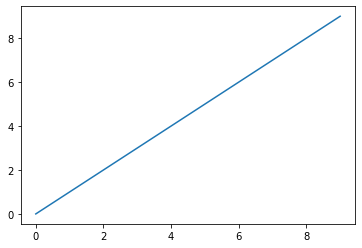

In [77]:
data = np.arange(10)
plt.plot(data)
plt.show()

## 2.1 figure와 subplot

matplotlib에서 그래프는 figure라는 큰 틀에 ax라는 subplot을 추가해서 만듦

In [82]:
# figure instance 생성
# 그림이 보이지는 않음 → 그림 보려면 subplot 생성 필요
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

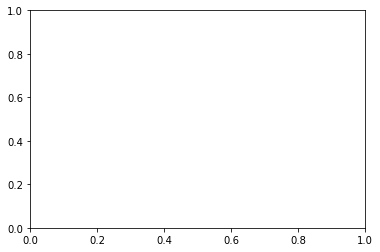

In [80]:
# 빈 subplot 생성
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

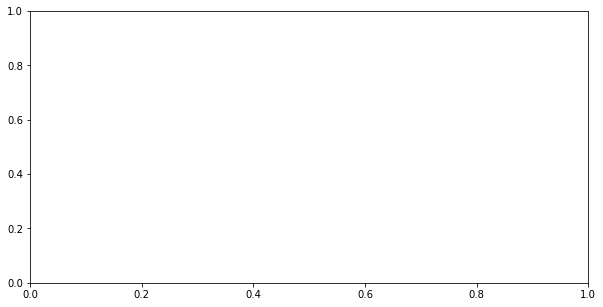

In [83]:
# figure size 조정하기
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
plt.show()

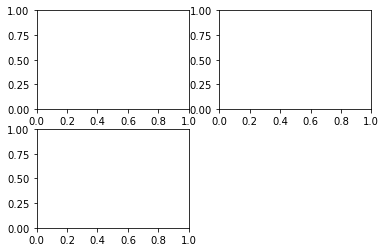

In [84]:
# 여러 개 subplot 생성
# index : 0이 아닌 1부터 시작
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.show()

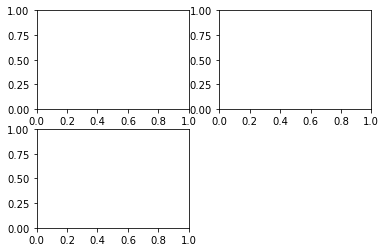

In [85]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax1 = fig.add_subplot(223)
plt.show()

## 2.2 plt로 graph 그리기

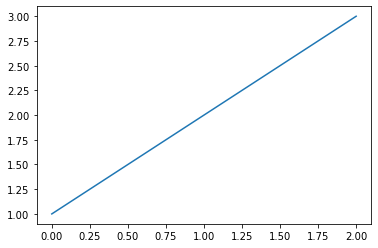

In [86]:
fig = plt.figure()
ax = fig.add_subplot()

data = np.array([1,2,3])

plt.plot(data)
plt.show()

방법1

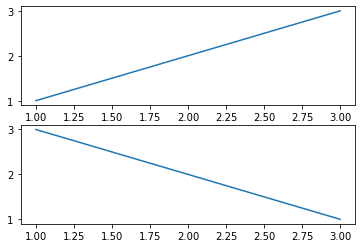

In [88]:
# 2개의 graph를 순차적으로 그리기
fig = plt.figure()

x = [1,2,3]
y1 = [1,2,3]
y2 = [3,2,1]

ax1 = fig.add_subplot(211)
plt.plot(x,y1)

ax2 = fig.add_subplot(212)
plt.plot(x,y2)

plt.show()

방법2

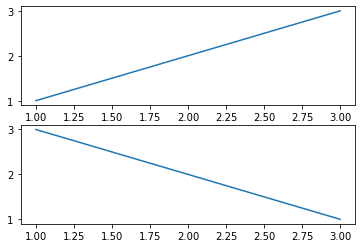

In [90]:
# 같은 graph를 subplot 객체 ax에 그리기
fig = plt.figure()

x = [1,2,3]
y1 = [1,2,3]
y2 = [3,2,1]

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x,y1)
ax2.plot(x,y2)

plt.show()

## 2.3 Plot 종류별 사용법

### 2.3.1 bar plot

- document 확인 방법 : plt.bar?
- ax.bar와 같이 사용
  - ax.bar() 쓰고 () 안에서 tab 누르면 사용 가능한 여러 인자 확인 가능
- x : x축에 사용될 값
- height : y축에 사용될 값
- width : 각 bar의 width
- bottom : y축의 base 값
- align : 정렬(center or edge)

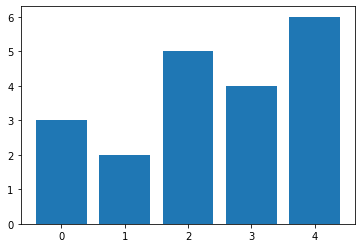

In [91]:
# bar plot
fig = plt.figure()
ax = fig.add_subplot()
ax.bar([0,1,2,3,4],[3,2,5,4,6])
plt.show()

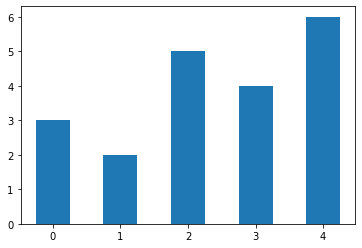

In [92]:
# width 조정
fig = plt.figure()
ax = fig.add_subplot()
ax.bar([0,1,2,3,4],[3,2,5,4,6], width=0.5)
plt.show()

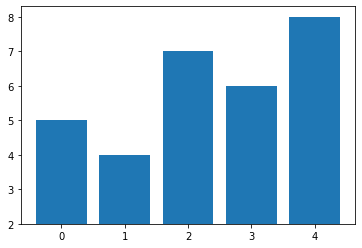

In [93]:
# bottom 조정
fig = plt.figure()
ax = fig.add_subplot()
ax.bar([0,1,2,3,4],[3,2,5,4,6], bottom=2)
plt.show()

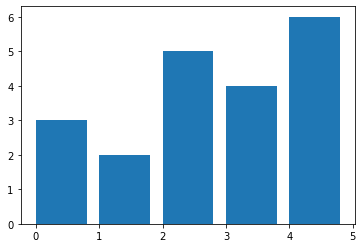

In [94]:
# align 조정 (default : center)
fig = plt.figure()
ax = fig.add_subplot()
ax.bar([0,1,2,3,4],[3,2,5,4,6], align='edge')
plt.show()

### 2.3.2 histogram plot

- data의 분포를 나타낼 때 사용
- x : 입력 data
- bins : histogram을 나타낼 x축의 구간(정수 입력 시 구간의 개수, list와 같은 sequence 입력 시 sequence 값이 구간으로 설정됨)
- range : x축 범위(x.min, x.max)로 표현
- density : 확률 분포로 나타낼 것인지 여부

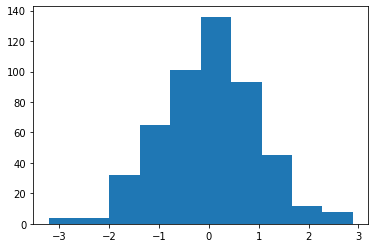

In [95]:
# histogram
np.random.seed(1111)

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(np.random.randn(500))
plt.show()

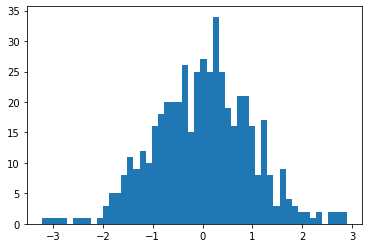

In [96]:
# bins 개수 늘리기
np.random.seed(1111)

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(np.random.randn(500), bins=50)
plt.show()

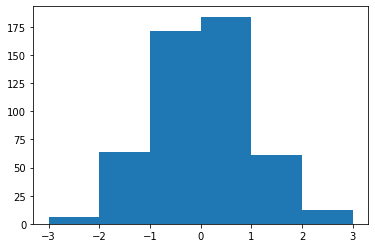

In [103]:
# bins : x축 값 정해주기
np.random.seed(1111)

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(np.random.randn(500), [-3,-2,-1,0,1,2,3])
#ax.hist(np.random.randn(500), np.linspace(-2,2,num=40))  # -2~2를 40개로 나눠서 표현하기
plt.show()

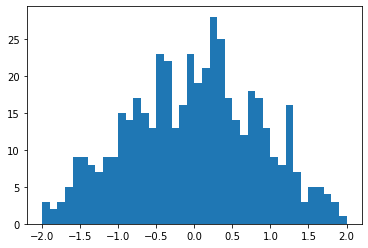

In [99]:
# range 정하기
np.random.seed(1111)

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(np.random.randn(500), bins=40, range=(-2,2))
plt.show()

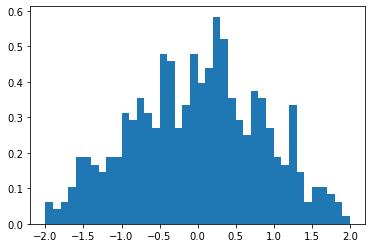

In [101]:
# density
# 원래 그래프의 y축 값은 빈도 개수인데 확률분포로 변경
# → 면적 = 1
np.random.seed(1111)

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(np.random.randn(500), bins=40, range=(-2,2), density=True)
plt.show()

### 2.3.3 line plot

- x, y data의 관계를 선으로 표시
- fmt : 색상, 마커, 선 스타일 등 설정
  - https://matplotlib.org/stable/gallery/color/named_colors.html
  - https://matplotlib.org/stable/api/markers_api.html
  - https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

주식 데이터

In [104]:
!pip install -U finance-datareader -q

In [105]:
import FinanceDataReader as fdr

005930 : 삼성전자 ID

In [108]:
df = fdr.DataReader('005930')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-03-02,1851,1906,1797,1834,570328,NaN
1998-03-03,1833,1879,1724,1779,433236,-0.029989
1998-03-04,1751,1779,1661,1741,352964,-0.021360
1998-03-05,1635,1688,1561,1587,417260,-0.088455
1998-03-06,1579,1633,1508,1578,553200,-0.005671


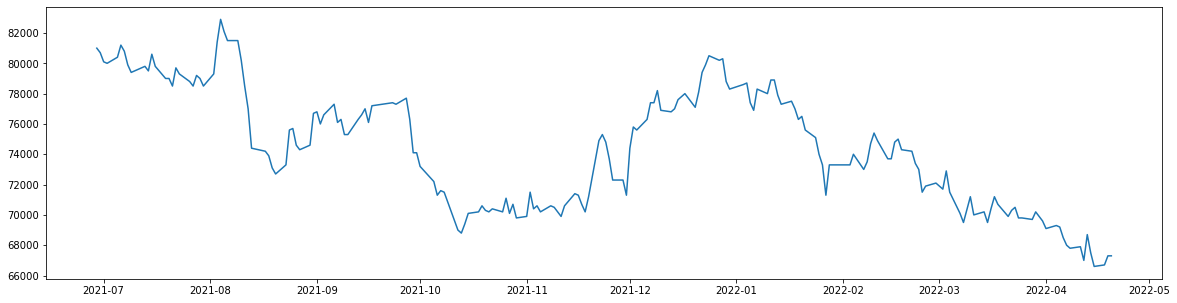

In [109]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot()
ax.plot(df['Close'][-200:])
plt.show()

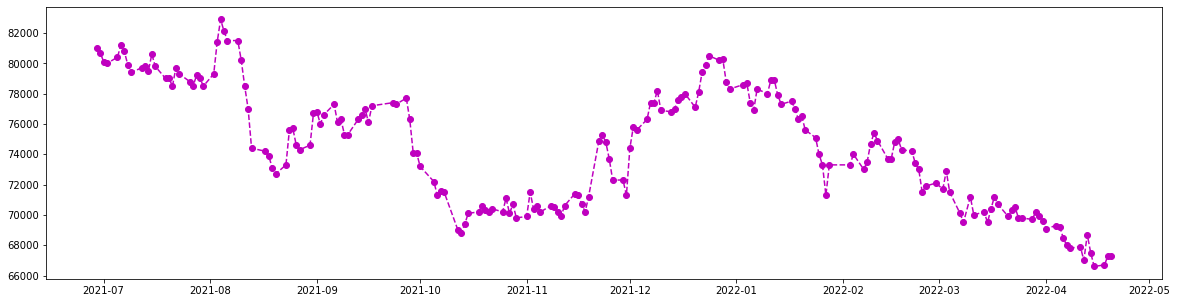

In [110]:
# format 변경
# m : 색상
# o : 동그라미 marker 표시
# -- : dash line
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot()
ax.plot(df['Close'][-200:], 'mo--')
plt.show()

### 2.3.4 scatter plot
- line plot과 유사하게 x, y data의 관계를 점으로 표시
- data 간 유사도와 같은 상관관계를 파악할 때 많이 사용
- 붓꽃 데이터셋 (iris.csv) 사용해 보기
  - https://www.kaggle.com/datasets/uciml/iris?resource=download

In [3]:
import pandas as pd

In [113]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


양의 상관관계 확인

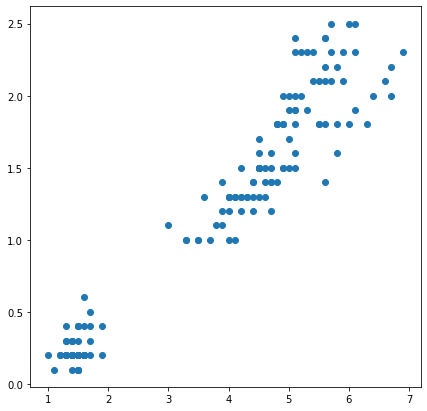

In [121]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot()
ax.scatter(x=iris_df['PetalLengthCm'],
           y=iris_df['PetalWidthCm'])

plt.show()

## 2.4 한 subplot에 여러 graph 그리기

### 2.4.1 3개 graph 동시에 그리기

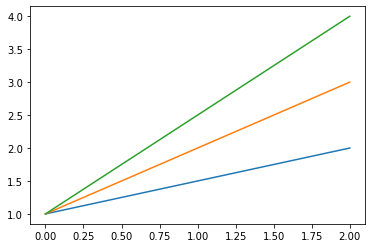

In [115]:
fig = plt.figure()

ax = fig.add_subplot()
ax.plot([1,1.5,2])
ax.plot([1,2,3])
ax.plot([1,2.5,4])

plt.show()

### 2.4.2 line plot과 bar plot 동시에 그리기

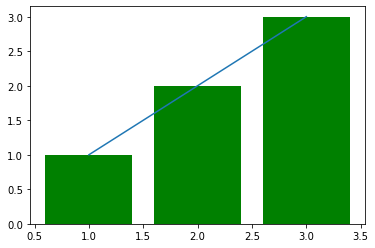

In [119]:
fig = plt.figure()

ax = fig.add_subplot()
ax.plot([1,2,3],[1,2,3])
ax.bar([1,2,3],[1,2,3,], color='green')

plt.show()

### 2.4.3 Species에 따라 다른 색 넣기

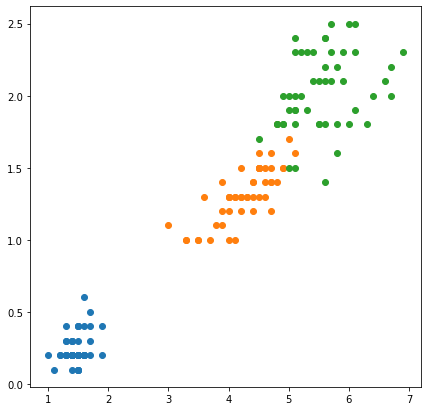

In [123]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot()

for species in iris_df['Species'].unique():
    iris_sub = iris_df[iris_df['Species']==species]
    ax.scatter(x=iris_sub['PetalLengthCm'],
               y=iris_sub['PetalWidthCm'])

plt.show()

### 2.4.4 여러 개 subplot 한 번에 만들기

plt.subplots 활용

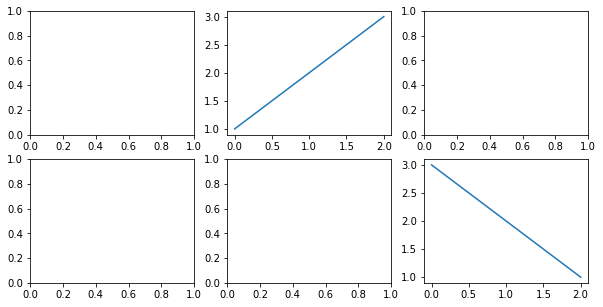

In [125]:
fig, axes = plt.subplots(2,3,figsize=(10,5))
axes[0,1].plot([1,2,3])   # 0행 1열에 plot 그리기
axes[1,2].plot([3,2,1])   # 1행 2열에 plot 그리기
plt.show()

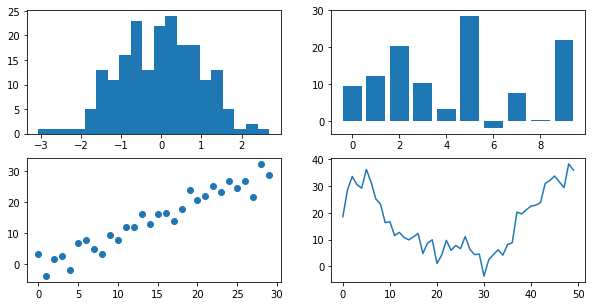

In [126]:
np.random.seed(1111)

fig, axes = plt.subplots(2,2,figsize=(10,5))
axes[0,0].hist(np.random.randn(200), bins=20)
axes[0,1].bar(np.arange(10), np.random.randn(10)*10+10)
axes[1,0].scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30))
axes[1,1].plot(np.random.randn(50).cumsum()*5+20)

plt.show()

★ y축 값 통일 : sharey = True

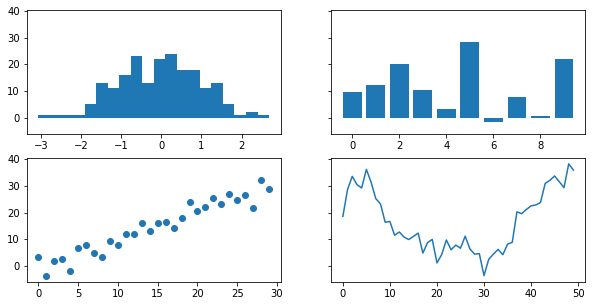

In [127]:
np.random.seed(1111)

fig, axes = plt.subplots(2,2,figsize=(10,5), sharey=True)
axes[0,0].hist(np.random.randn(200), bins=20)
axes[0,1].bar(np.arange(10), np.random.randn(10)*10+10)
axes[1,0].scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30))
axes[1,1].plot(np.random.randn(50).cumsum()*5+20)

plt.show()

subplot 간격 조정

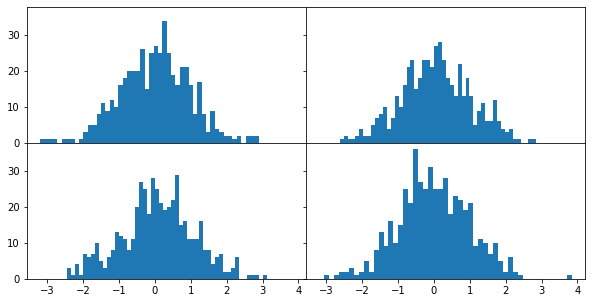

In [128]:
np.random.seed(1111)

fig, axes = plt.subplots(2,2,figsize=(10,5), sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50)

# wspace : 가로 간격 조정
# hspace : 세로 간격 조정
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

### 2.4.5 색상 지정하기

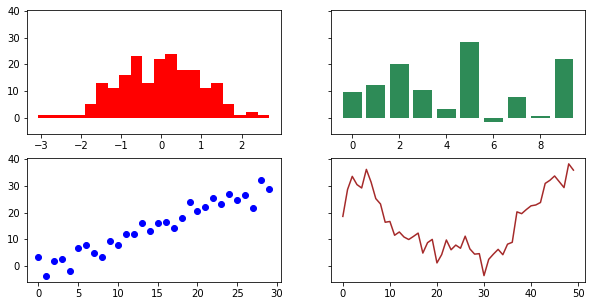

In [129]:
np.random.seed(1111)

fig, axes = plt.subplots(2,2,figsize=(10,5), sharey=True)
axes[0,0].hist(np.random.randn(200), bins=20, color='r')
axes[0,1].bar(np.arange(10), np.random.randn(10)*10+10, color='seagreen')
axes[1,0].scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30), color='#0000ff')
axes[1,1].plot(np.random.randn(50).cumsum()*5+20, color='brown')

plt.show()

## 2.5 label 지정하기

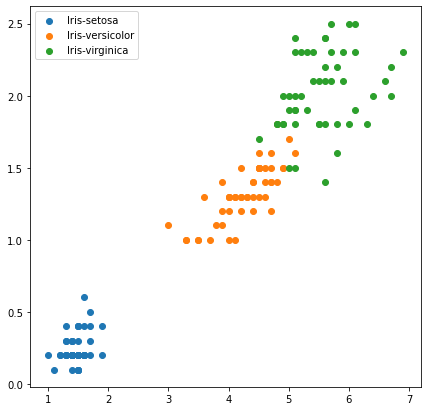

In [130]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot()

for species in iris_df['Species'].unique():
    iris_sub = iris_df[iris_df['Species']==species]
    ax.scatter(x=iris_sub['PetalLengthCm'],
               y=iris_sub['PetalWidthCm'],
               label=species)

plt.legend()
plt.show()

## 2.6 제목, 축이름, 눈금 설정하기

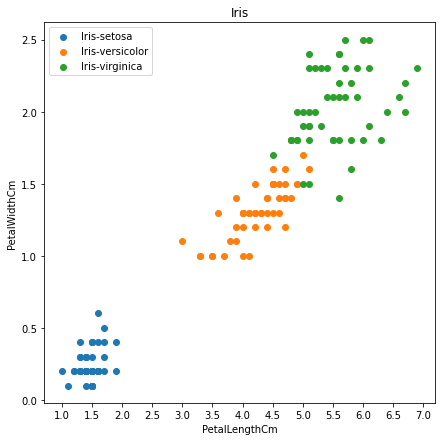

In [131]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot()

for species in iris_df['Species'].unique():
    iris_sub = iris_df[iris_df['Species']==species]
    ax.scatter(x=iris_sub['PetalLengthCm'],
               y=iris_sub['PetalWidthCm'],
               label=species)

ax.set_title('Iris')
xticks = np.arange(1, 7.5, 0.5)  # x눈금 설정 : 1부터 7.5까지 0.5 간격
ax.set_xticks(xticks)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')

plt.legend()
plt.show()

# 3. Image Data Visualization

- plt.imshow()를 이용하여 화면에 출력
- X : image data
  - gray scale : 2차원 RGB, 3차원 RGBA
  - data shape : height, width, channel 순서
- cmap : colormap
  - https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
from PIL import Image

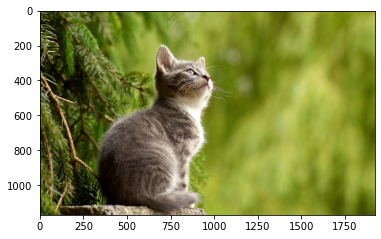

In [7]:
image = Image.open('cat.jpg')

fig = plt.figure()

ax = fig.add_subplot()
ax.imshow(image)

plt.show()

Oxford IIIT Pet dataset을 다운받아 화면에 출력
- https://www.robots.ox.ac.uk/~vgg/data/pets/

In [9]:
import os
import random
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle  # 사각형 그리는 library

In [138]:
pip install gdown

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=c517a89e4ca8617237827faca6e88b5a1f4424262c6e81d4656e02fffce956dc
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7b\7b\5d\656f46cd6889e4c93977be9586901d0adc1271b2d876c84c96
Successfully built gdown
Note: you may need to restart the kernel to use updated packages.


In [5]:
import gdown
url = 'https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0'
fname = 'oxford_pet.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0
To: C:\Users\User\LGUplus_Fastcampus\한번에끝내는딥러닝\oxford_pet.zip
100%|███████████████████████████████████████████████████████████████████████████████| 811M/811M [01:15<00:00, 10.7MB/s]


'oxford_pet.zip'

oxford_pet 압축 풀기
- window : unzip 명령어 없음 → Error 발생
- Google Colaboratory로 하기

In [6]:
!unzip -q oxford_pet.zip -d oxford_pet

'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


경로 지정

In [10]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')   # bounding box
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps') # segmentation

In [ ]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']

In [ ]:
rnd_idx = random.randint(1, len(bbox_files))  # 랜덤하게 index 1개 추출

bbox_name = bbox_files[rnd_idx]
bbox_path = os.path.join(bbox_dir, bbox_name)
tree = et.parse(bbox_path)

width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymax

# xml 파일에서 '.xml'을 '.jpg'로 바꿔서 가져오기
fname = os.path.splitext(bbox_name)[0]+'.jpg'
fpath = os.path.join(image_dir, fname)
image = Image.open(fpath)
# image = np.array(image)

bbox_name = os.path.splitext(fname)[0]+'.xml'

fig, ax = plt.subplots(1,1)
rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
ax.add_patch(rect)
ax.imshow(image)
plt.show()

In [ ]:
# xml 파일에서 '.xml'을 '.png'로 바꿔서 가져오기
sname = os.path.splitext(bbox_name)[0]+'.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)

fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].imshow(image)
ax[1].imshow(seg)
plt.show()

두 개 이미지 겹쳐 보기

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(image)
ax.imshow(seg, alpha=0.5)
plt.show()